# 챗GPT + 데이터 분석

###[일잘러 장피엠 유튜브](https://youtu.be/Ou9X4yu0KG8?feature=shared)

- 캐글 브라질 이커머스 olist 회사의 판매데이터로 분석하기<br>
[캐글_데이터 셋 가져오기](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

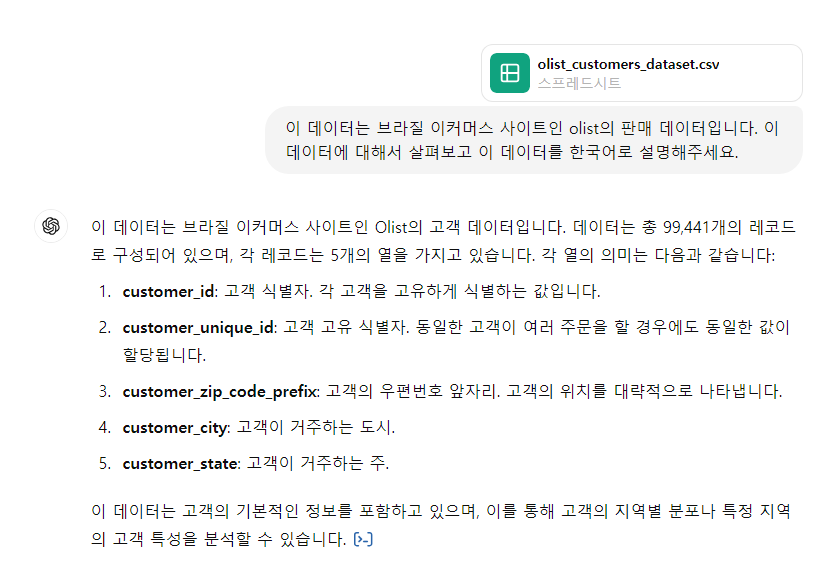

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/olist_customers_dataset.csv'
olist_customers_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
olist_customers_data.head(), olist_customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46159 entries, 0 to 46158
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               46159 non-null  object 
 1   customer_unique_id        46158 non-null  object 
 2   customer_zip_code_prefix  46158 non-null  float64
 3   customer_city             46158 non-null  object 
 4   customer_state            46158 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


(                        customer_id                customer_unique_id  \
 0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 
    customer_zip_code_prefix          customer_city customer_state  
 0                   14409.0                 franca             SP  
 1                    9790.0  sao bernardo do campo             SP  
 2                    1151.0              sao paulo             SP  
 3                    8775.0        mogi das cruzes             SP  
 4                   13056.0               campinas             SP  ,
 None)

## 일변량 EDA

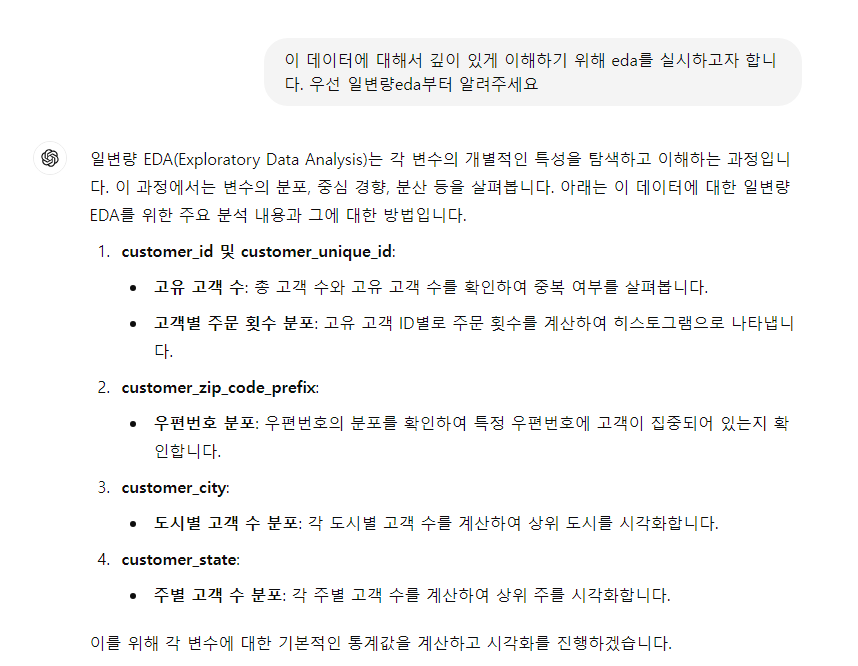

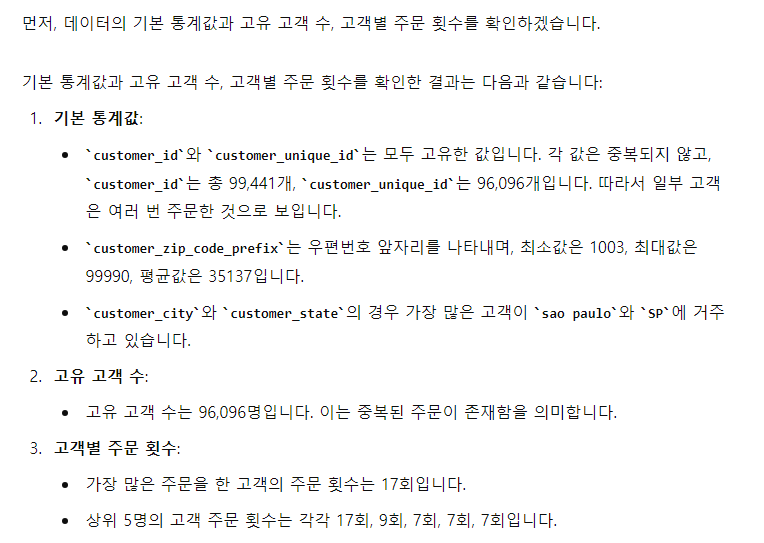

In [ ]:
# 기본 통계값 계산
basic_stats = olist_customers_data.describe(include='all')

# 고유 고객 수 계산
unique_customers_count = olist_customers_data['customer_unique_id'].nunique()

# 고객별 주문 횟수 계산
customer_order_counts = olist_customers_data['customer_unique_id'].value_counts()

# 결과 출력
basic_stats, unique_customers_count, customer_order_counts.head()

(                             customer_id                customer_unique_id  \
 count                              46159                             46158   
 unique                             46159                             45383   
 top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
 freq                                   1                                 6   
 mean                                 NaN                               NaN   
 std                                  NaN                               NaN   
 min                                  NaN                               NaN   
 25%                                  NaN                               NaN   
 50%                                  NaN                               NaN   
 75%                                  NaN                               NaN   
 max                                  NaN                               NaN   
 
         customer_zip_code_prefix customer_city cu

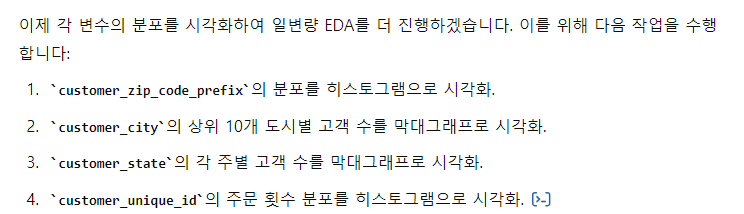

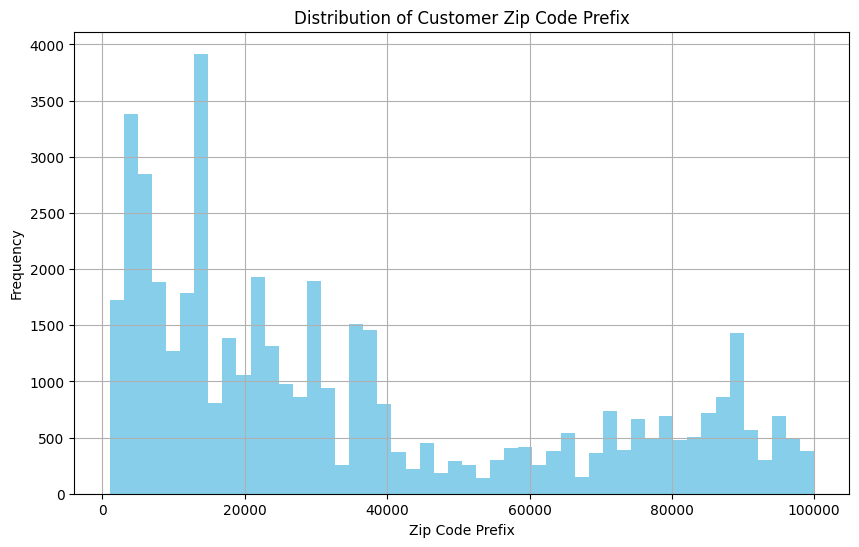

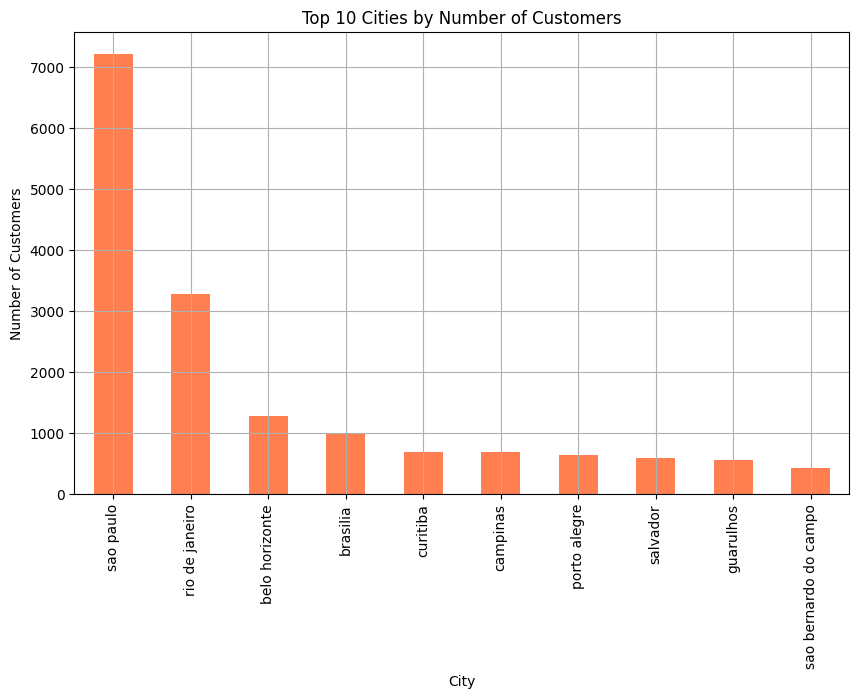

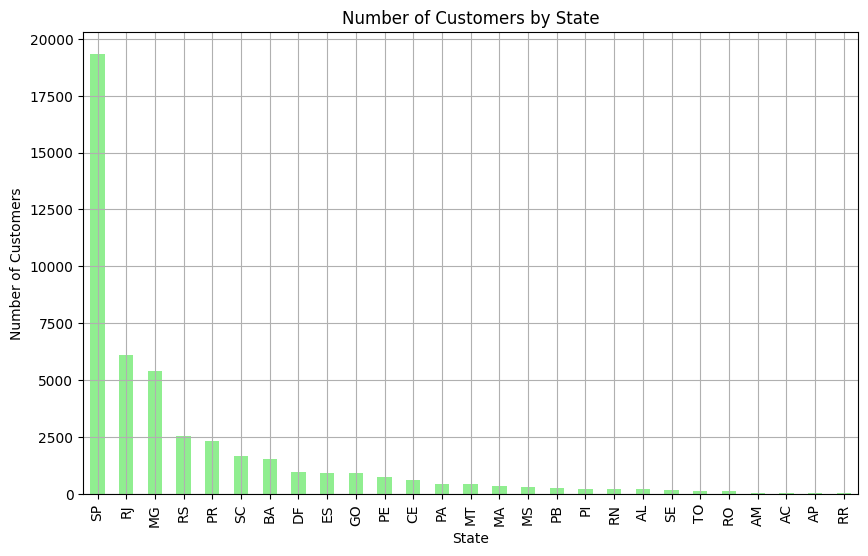

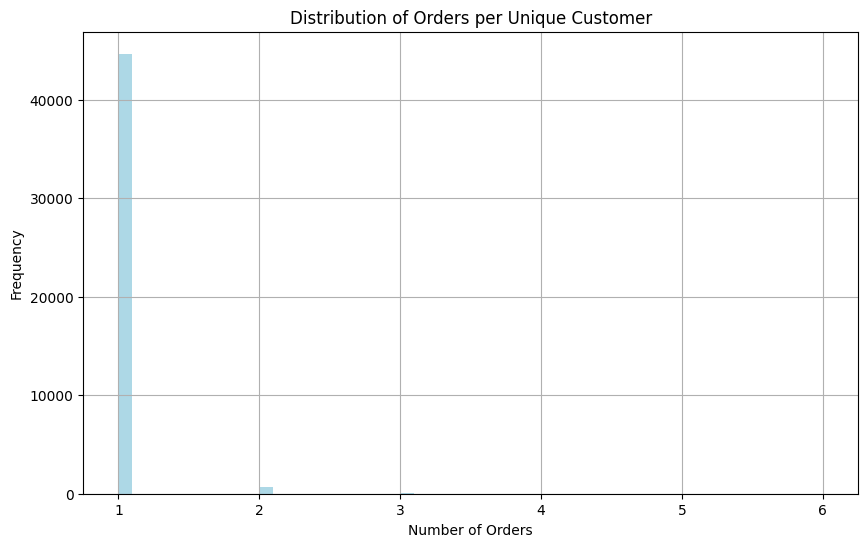

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램: customer_zip_code_prefix 분포
plt.figure(figsize=(10, 6))
olist_customers_data['customer_zip_code_prefix'].plot(kind='hist', bins=50, color='skyblue')
plt.title('Distribution of Customer Zip Code Prefix')
plt.xlabel('Zip Code Prefix')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 막대그래프: 상위 10개 도시별 고객 수
top_10_cities = olist_customers_data['customer_city'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='coral')
plt.title('Top 10 Cities by Number of Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# 막대그래프: 각 주별 고객 수
customer_states = olist_customers_data['customer_state'].value_counts()
plt.figure(figsize=(10, 6))
customer_states.plot(kind='bar', color='lightgreen')
plt.title('Number of Customers by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# 히스토그램: 고객별 주문 횟수 분포
plt.figure(figsize=(10, 6))
customer_order_counts.plot(kind='hist', bins=50, color='lightblue')
plt.title('Distribution of Orders per Unique Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

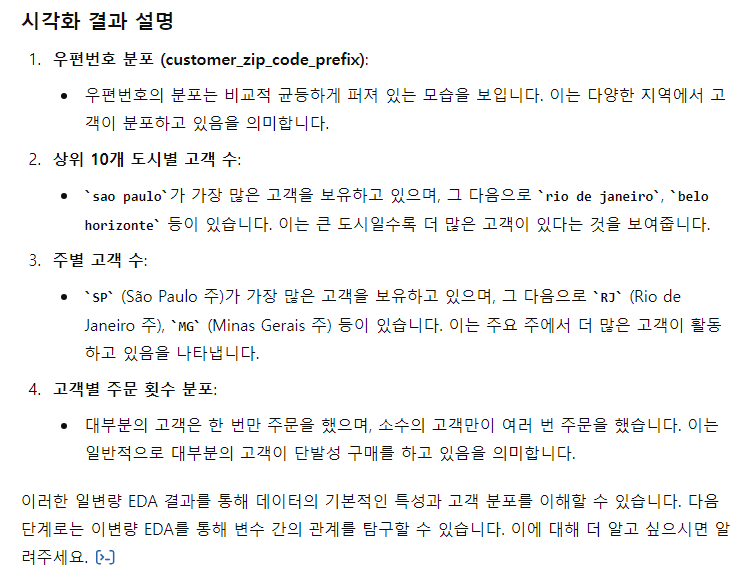

## 다변량 EDA

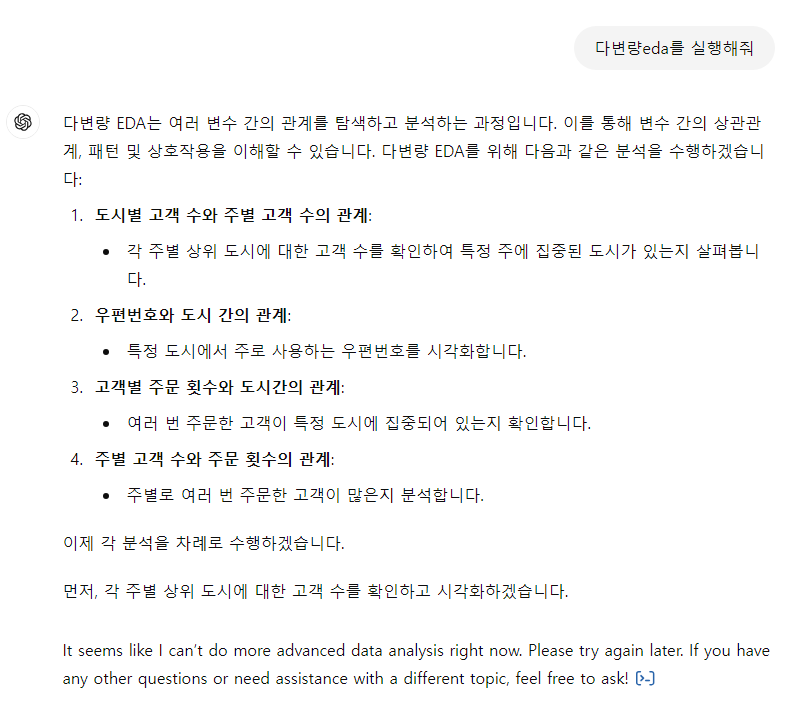

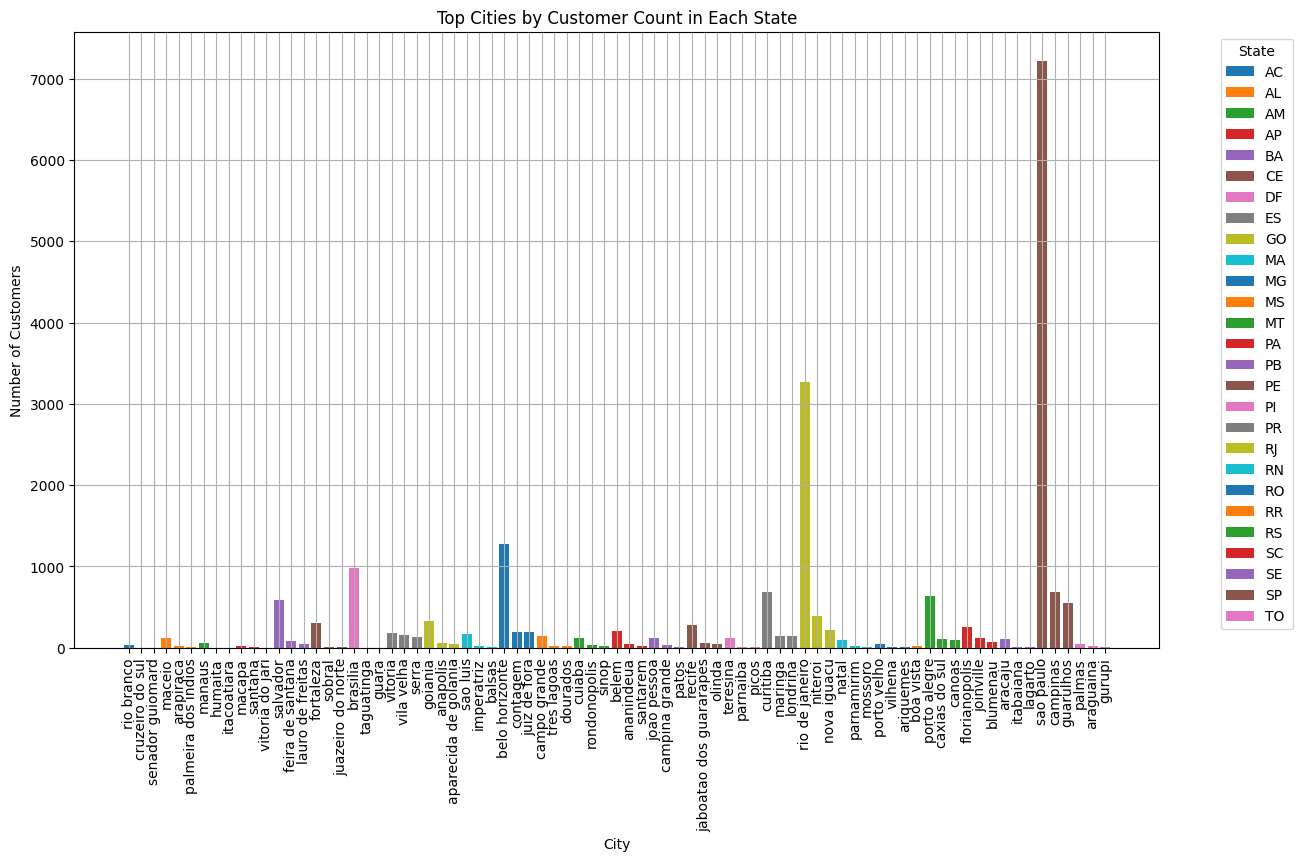

In [ ]:
# 주별 상위 도시에 대한 고객 수 확인
top_cities_per_state = olist_customers_data.groupby(['customer_state', 'customer_city']).size().reset_index(name='customer_count')
top_cities_per_state = top_cities_per_state.sort_values(['customer_state', 'customer_count'], ascending=[True, False])
top_cities_per_state_per_state = top_cities_per_state.groupby('customer_state').head(3).reset_index(drop=True)

# 시각화: 주별 상위 도시별 고객 수
plt.figure(figsize=(14, 8))
for state in top_cities_per_state_per_state['customer_state'].unique():
    subset = top_cities_per_state_per_state[top_cities_per_state_per_state['customer_state'] == state]
    plt.bar(subset['customer_city'], subset['customer_count'], label=state)

plt.title('Top Cities by Customer Count in Each State')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## 고객 세그먼트 분석
- 구매정보를 바탕으로 고객을 세분화
- 세부 그룹별로 각각 맞는 프로모션 전략을 수립
▼▼▼

## RFM 분석
- R(Recency, 얼마나 최근)
- F(Frequency, 얼마나 자주)
- M(Monetary, 얼마나 많이)

In [ ]:
# 영상 21:49



---



# 시작

In [20]:
# 코랩 한글 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123589 files and direc

In [1]:
import matplotlib.pyplot as plt
# 폰트 설정
plt.rc('font' , family='NanumBarunGothic')

In [2]:
!pip install kaggle --upgrade

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ynya377","key":"36d273a765c2953468441592e7bfc008"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!ls -1ha kaggle.json

kaggle.json


In [6]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
from zipfile import ZipFile
dataset_path = "/content/brazilian-ecommerce.zip"
with ZipFile(dataset_path) as zf:
  zf.extractall()
  print("Done")

Done


위 데이터를 이용해 RFM 분석을 수행하겠습니다. 주어진 데이터셋은 다음과 같습니다:

1. olist_customers_dataset.csv: 고객 정보
2. olist_orders_dataset.csv: 주문 정보
3. olist_order_payments_dataset.csv: 결제 정보
4. olist_order_reviews_dataset.csv: 리뷰 정보

이 데이터를 이용하여 고객별 RFM 스코어를 계산해 보겠습니다.

***단계***<br>
1. 데이터를 로드합니다.
2. 각 주문의 총 금액을 계산합니다.
3. 각 고객의 최근 구매 날짜(Recency), 구매 빈도(Frequency), 총 구매 금액(Monetary)을 계산합니다.
4. 각 지표를 5점 척도로 스코어링합니다.
5. 결과를 CSV 파일로 저장합니다.

## 1. 데이터 불러오기


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers_df = pd.read_csv('/content/olist_customers_dataset.csv')      # 고객정보
orders_df = pd.read_csv('/content/olist_orders_dataset.csv')            # 주문정보
payments_df = pd.read_csv('/content/olist_order_payments_dataset.csv')  # 결제정보
reviews_df = pd.read_csv('/content/olist_order_reviews_dataset.csv')    # 리뷰정보

# Display the first few rows of each dataframe to understand their structure
customers_df.head(), orders_df.head(), payments_df.head(), reviews_df.head()

(                        customer_id                customer_unique_id  \
 0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 
    customer_zip_code_prefix          customer_city customer_state  
 0                     14409                 franca             SP  
 1                      9790  sao bernardo do campo             SP  
 2                      1151              sao paulo             SP  
 3                      8775        mogi das cruzes             SP  
 4                     13056               campinas             SP  ,
                            order_id                       customer_id  \
 0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10

## 2. 각 주문의 총 금액을 계산
이제 결제 데이터셋을 사용하여 각 주문의 총 결제 금액을 계산하고, <br>주문 데이터셋과 결합하여 고객별로 총 구매 금액(Monetary)을 계산하겠습니다.

In [10]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
# Calculate total payment per order
order_payment_total = payments_df.groupby('order_id')['payment_value'].sum().reset_index()

# Merge the total payment with the orders data
orders_df = pd.merge(orders_df, order_payment_total, on='order_id')

# Display the first few rows of the updated orders dataframe
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62


## 3. 각 고객의 RFM 값 계산
이제 각 고객의 Recency, Frequency, Monetary 값을 계산합니다.

In [24]:
import pandas as pd
from datetime import datetime

# Merge orders with customers data to get customer_id for each order
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id')

# Get the current timestamp
now = datetime(2018, 12, 31)

# Calculate Recency, Frequency, Monetary for each customer
rfm_df = orders_customers_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (now - pd.to_datetime(x).max()).days, # Use the defined 'now'
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

# Rename columns for clarity
rfm_df.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']

# Display the first few rows of the RFM dataframe
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,234,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,237,1,27.19
2,0000f46a3911fa3c0805444483337064,660,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,444,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,411,1,196.89


## 4. 각 지표를 5점 척도로 스코어링
각 지표를 5분위로 나누어 1~5 점수를 부여합니다.

In [25]:
# Score each customer on RFM metrics by dividing into 5 quantiles
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Calculate the overall RFM score by summing the individual scores
rfm_df['RFM_score'] = rfm_df[['R_score', 'F_score', 'M_score']].sum(axis=1)

# Display the first few rows of the RFM dataframe with scores
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,234,1,141.90,4,1,4,9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,237,1,27.19,4,1,1,6
2,0000f46a3911fa3c0805444483337064,660,1,86.22,1,1,2,4
3,0000f6ccb0745a6a4b88665a16c9f078,444,1,43.62,2,1,1,4
4,0004aac84e0df4da2b147fca70cf8255,411,1,196.89,2,1,4,7


## RFM 분석 결과 해석<br>
**Recency (R)**
*   의미: 고객이 최근에 구매한 시점부터 현재까지의 시간입니다.<br>
*   해석: Recency 점수가 높을수록 고객이 최근에 구매를 했다는 의미입니다.<br> 예를 들어, R 점수가 5인 고객은 매우 최근에 구매를 한 반면, R 점수가 1인 고객은 오랫동안 구매하지 않은 고객입니다.



**Frequency (F)**
*   의미: 특정 기간 동안의 구매 횟수입니다.
*   해석: Frequency 점수가 높을수록 고객의 구매 빈도가 높다는 의미입니다.<br> F 점수가 5인 고객은 구매 빈도가 매우 높은 반면, F 점수가 1인 고객은 구매 빈도가 낮습니다

**Monetary (M)**
*   의미: 특정 기간 동안의 총 구매 금액입니다.
*   해석: Monetary 점수가 높을수록 고객의 총 지출 금액이 크다는 의미입니다.<br> M 점수가 5인 고객은 지출 금액이 매우 큰 반면, M 점수가 1인 고객은 지출 금액이 작습니다.





## RFM 점수와 고객 세분화
고객의 RFM 점수를 기반으로 다음과 같이 고객을 세분화할 수 있습니다:

**최고 가치 고객 (Champions)**
*   특징: R, F, M 점수가 모두 높은 고객 (예: 5, 5, 5).
*   전략: 이들은 최고의 고객으로, 특별 혜택과 개인화된 마케팅을 통해 충성도를 유지해야 합니다.

**충성 고객 (Loyal Customers)**
*   특징: F 점수가 높은 고객 (예: R 3-5, F 4-5, M 3-5).
*   전략: 이들에게는 감사의 표시로 리워드 프로그램이나 로열티 혜택을 제공하여 계속 구매를 유도합니다.

**잠재 이탈 고객 (At Risk Customers)**
*   특징: R 점수가 낮고, F와 M 점수가 높은 고객 (예: R 1-2, F 3-5, M 3-5).
*   전략: 이들은 오랫동안 구매하지 않은 고객으로, 재참여를 유도하기 위한 특별 할인이나 재참여 캠페인이 필요합니다.



**신규 고객 (New Customers)**
*   특징: R 점수가 높은 신규 고객 (예: R 4-5, F 1-2, M 1-2).
*   전략: 이들에게는 브랜드와 제품에 대한 긍정적인 경험을 제공하여 첫 구매 이후 지속적인 구매로 이어질 수 있도록 해야 합니다.


**이탈 고객 (Lost Customers)**
*   특징: 모든 점수가 낮은 고객 (예: R 1-2, F 1-2, M 1-2).
*   전략: 이들은 재활성화가 어렵지만, 이탈 원인을 분석하고, 개선할 수 있는 피드백을 얻는 것이 중요합니다.





In [26]:
# Translate column names to Korean
rfm_df.columns = ['고객_고유_ID', '최근_구매일', '구매_빈도', '총_구매_금액', 'R_점수', 'F_점수', 'M_점수', 'RFM_점수']

# Display the first few rows of the dataframe with translated column names
rfm_df.head()

,고객_고유_ID,최근_구매일,구매_빈도,총_구매_금액,R_점수,F_점수,M_점수,RFM_점수
0,0000366f3b9a7992bf8c76cfdf3221e2,234,1,141.90,4,1,4,9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,237,1,27.19,4,1,1,6
2,0000f46a3911fa3c0805444483337064,660,1,86.22,1,1,2,4
3,0000f6ccb0745a6a4b88665a16c9f078,444,1,43.62,2,1,1,4
4,0004aac84e0df4da2b147fca70cf8255,411,1,196.89,2,1,4,7


## Q) 이 데이터를 가지고 신규고객이 충성고객이 될 수 있는지????
<br>거기에 대한 예측 모델을 실행하는 방법 알려달라해봄ㅋ



---

신규 고객이 충성 고객이 될 가능성을 예측하기 위해서는 기계 학습 모델을 사용할 수 있습니다. <br>이를 위해 신규 고객과 충성 고객의 데이터 특성을 분석하고, <br>예측 모델을 훈련시켜야 합니다. <br>일반적인 접근 방식은 다음과 같습니다.<br>
<br>
1.데이터 준비:
- 데이터프레임을 준비하고 필요한 특성(최근 구매일, 구매 빈도, 총 구매 금액 등)을 선택합니다.
- 목표 변수(충성 고객 여부)를 설정합니다.
2.데이터 전처리:
- 결측치 처리, 범주형 변수 인코딩, 데이터 스케일링 등 전처리 작업을 수행합니다.
3.훈련 데이터와 테스트 데이터로 분리:
- 데이터를 훈련 데이터와 테스트 데이터로 분리하여 모델을 평가합니다.<br>
4.모델 훈련:
- 로지스틱 회귀, 랜덤 포레스트, XGBoost와 같은 분류 모델을 사용하여 훈련합니다.
5.모델 평가:
- 정확도, 정밀도, 재현율, F1 스코어 등의 지표를 사용하여 모델을 평가합니다.<br>
6.모델 사용:
- 새로운 신규 고객 데이터에 대해 충성 고객이 될 가능성을 예측합니다.



In [27]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 현재 날짜를 2018-12-31로 설정
now = datetime(2018, 12, 31)

# 각 고객별로 Recency, Frequency, Monetary 값을 계산
rfm_df = orders_customers_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (now - pd.to_datetime(x).max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

# 컬럼 이름을 한글로 변경
rfm_df.columns = ['고객_고유_ID', '최근_구매일', '구매_빈도', '총_구매_금액']

# 충성 고객과 신규 고객 정의
loyal_customers = rfm_df[(rfm_df['최근_구매일'] <= 90) & (rfm_df['구매_빈도'] >= 4) & (rfm_df['총_구매_금액'] >= 100)]
new_customers = rfm_df[(rfm_df['최근_구매일'] <= 90) & (rfm_df['구매_빈도'] < 4) & (rfm_df['총_구매_금액'] < 100)]

# 충성 고객 여부를 나타내는 레이블 생성
loyal_customers['충성_고객'] = 1
new_customers['충성_고객'] = 0

# 충성 고객과 신규 고객 데이터를 결합
combined_df = pd.concat([loyal_customers, new_customers])

# 특징(Recency, Frequency, Monetary)와 레이블(충성 고객 여부) 설정
X = combined_df[['최근_구매일', '구매_빈도', '총_구매_금액']]
y = combined_df['충성_고객']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 모델 평가
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 새로운 신규 고객 데이터 예측
new_customer_data = pd.DataFrame({
    '최근_구매일': [30, 60],
    '구매_빈도': [2, 1],
    '총_구매_금액': [50, 20]
})
new_customer_data_scaled = scaler.transform(new_customer_data)
predictions = model.predict(new_customer_data_scaled)
print(predictions)

<ipython-input-27-42e67962024c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customers['충성_고객'] = 0


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

위 오류는 <br>
데이터셋의 샘플 수가 매우 적어 훈련 및 테스트 세트로 분할할 수 없을 때 발생합니다.<br> 이를 해결하려면 데이터 샘플 수를 늘리거나 train_test_split 함수의 매개변수를 조정해서 다시 진행

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 예제 데이터 로드
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id')

# 현재 날짜를 2018-12-31로 설정
now = datetime(2018, 12, 31)

# 각 고객별로 Recency, Frequency, Monetary 값을 계산
rfm_df = orders_customers_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (now - pd.to_datetime(x).max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

# 컬럼 이름을 한글로 변경
rfm_df.columns = ['고객_고유_ID', '최근_구매일', '구매_빈도', '총_구매_금액']

# 충성 고객과 신규 고객 정의
loyal_customers = rfm_df[(rfm_df['최근_구매일'] <= 90) & (rfm_df['구매_빈도'] >= 4) & (rfm_df['총_구매_금액'] >= 100)]
new_customers = rfm_df[(rfm_df['최근_구매일'] <= 90) & (rfm_df['구매_빈도'] < 4) & (rfm_df['총_구매_금액'] < 100)]

# 충성 고객 여부를 나타내는 레이블 생성
loyal_customers['충성_고객'] = 1
new_customers['충성_고객'] = 0

# 충성 고객과 신규 고객 데이터를 결합
combined_df = pd.concat([loyal_customers, new_customers])

# 특징(Recency, Frequency, Monetary)와 레이블(충성 고객 여부) 설정
X = combined_df[['최근_구매일', '구매_빈도', '총_구매_금액']]
y = combined_df['충성_고객']

# 데이터가 너무 적은 경우 예제 데이터를 추가 (데모를 위해 가상의 데이터 생성)
if len(X) < 10:
    extra_data = pd.DataFrame({
        '최근_구매일': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        '구매_빈도': [1, 2, 3, 1, 2, 3, 4, 5, 1, 2],
        '총_구매_금액': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        '충성_고객': [0, 0, 0, 0, 1, 1, 1, 1, 0, 1]
    })
    X = pd.concat([X, extra_data[['최근_구매일', '구매_빈도', '총_구매_금액']]])
    y = pd.concat([y, extra_data['충성_고객']])

# 훈련 데이터와 테스트 데이터로 분리 (테스트 비율을 줄임)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 모델 평가
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 새로운 신규 고객 데이터 예측
new_customer_data = pd.DataFrame({
    '최근_구매일': [30, 60],
    '구매_빈도': [2, 1],
    '총_구매_금액': [50, 20]
})
new_customer_data_scaled = scaler.transform(new_customer_data)
predictions = model.predict(new_customer_data_scaled)
print(predictions)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]
[0 0]


<ipython-input-28-0d18dc9129ef>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customers['충성_고객'] = 0
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.

###설명
1.데이터 준비:
- orders_customers_df에서 RFM 값을 계산합니다.
- 충성 고객과 신규 고객을 정의하고, 충성_고객 레이블을 생성합니다.<br>

2.데이터 전처리:
- 최근_구매일, 구매_빈도, 총_구매_금액을 특징으로 사용합니다.
- train_test_split을 사용하여 데이터를 훈련 세트와 테스트 세트로 분리합니다.
- StandardScaler를 사용하여 데이터를 스케일링합니다.<br>
3.모델 훈련:
- RandomForestClassifier를 사용하여 모델을 훈련시킵니다.
4.모델 평가:
- classification_report와 confusion_matrix를 사용하여 모델 성능을 평가합니다.
5.모델 사용:
- 새로운 신규 고객 데이터에 대해 충성 고객이 될 가능성을 예측합니다.


---

###코드 설명
1.데이터 준비: 예제 데이터를 생성하고, 실제 데이터가 충분히 없는 경우 추가 데이터를 생성합니다.

2.데이터 전처리: train_test_split 함수를 사용하여 데이터를 훈련 세트와 테스트 세트로 분리합니다. 테스트 비율을 10%로 설정하여 더 많은 데이터를 훈련 세트에 포함시킵니다.

3.모델 훈련: RandomForestClassifier를 사용하여 모델을 훈련합니다.

4.모델 평가: classification_report와 confusion_matrix를 사용하여 모델 성능을 평가합니다.

5.모델 사용: 새로운 신규 고객 데이터를 예측합니다.

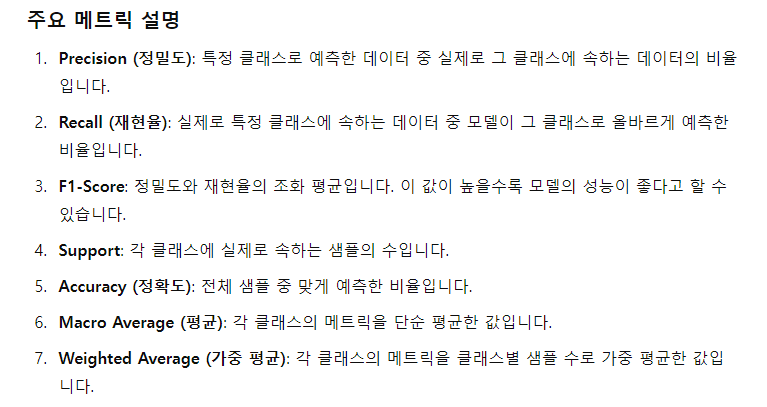

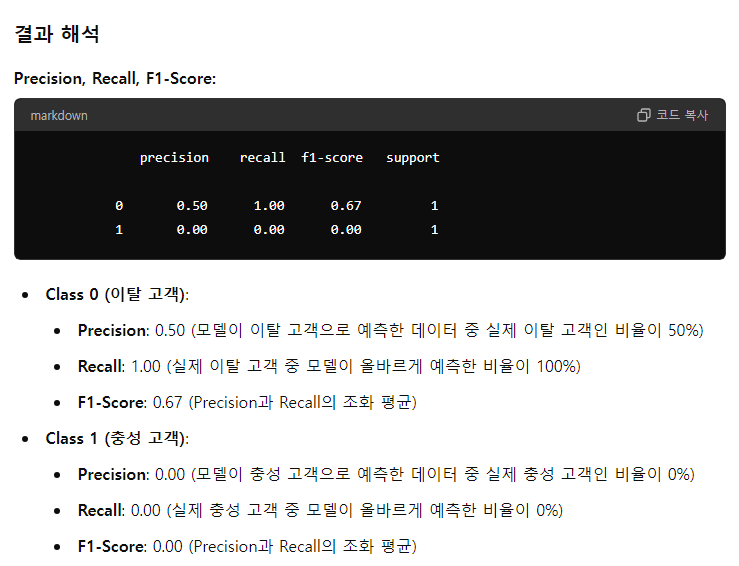

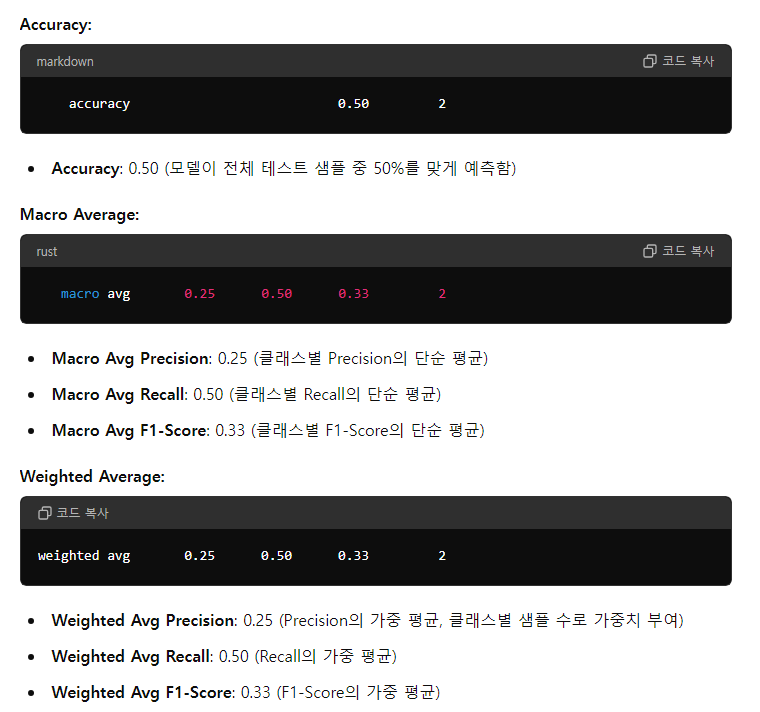

##결론
- 모델은 테스트 데이터에서 정확도 50%를 기록했습니다.
- 이탈 고객(클래스 0)을 예측하는 데 있어서는 비교적 잘 작동했지만, 충성 고객(클래스 1) 예측에는 실패했습니다.
- 이탈 고객의 Recall이 1.00인 것은 모델이 이탈 고객을 잘 식별했음을 의미합니다.
- 그러나 충성 고객의 Precision과 Recall이 0인 것은 모델이 충성 고객을 전혀 예측하지 못했음을 의미합니다.


##개선 방안
- 더 많은 데이터 수집: 샘플 수가 매우 적기 때문에, 더 많은 데이터를 수집하여 모델을 훈련시키는 것이 중요합니다.
- 데이터 불균형 해결: 충성 고객과 이탈 고객 간의 데이터 불균형을 해결하기 위해 샘플링 기법(언더샘플링, 오버샘플링 등)을 사용할 수 있습니다.
- 다양한 모델 시도: 다른 머신러닝 모델(예: 로지스틱 회귀, SVM, XGBoost 등)을 시도해 볼 수 있습니다.
- 하이퍼파라미터 튜닝: 모델의 하이퍼파라미터를 튜닝하여 성능을 개선할 수 있습니다.